In [ ]:
import numpy as np
import tensorflow as tf
import keras
import cv2
from keras.layers import MaxPool2D,Conv2D,UpSampling2D,Input,Dropout
from keras.models import Sequential
from keras.preprocessing.image import img_to_array
import os
from tqdm import tqdm
import re
import matplotlib.pyplot as plt

In [ ]:
#Unzip File (zip) - Link ke google drive
import zipfile
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
zip_ref = zipfile.ZipFile("/content/drive/My Drive/archive.zip", 'r')
zip_ref.extractall("/content/")
zip_ref.close()

In [ ]:
#Read Image
# to get the files in proper order
def sorted_alphanumeric(data):
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)',key)]
    return sorted(data,key = alphanum_key)
# defining the size of the image
SIZE = 160
color_img = []
path = '/content/landscape Images/color'
files = os.listdir(path)
files = sorted_alphanumeric(files[0:1500])
for i in tqdm(files):
    if i == '6000.jpg':
        break
    else:
        img = cv2.imread(path + '/'+i,1)
        # open cv reads images in BGR format so we have to convert it to RGB
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        #resizing image
        img = cv2.resize(img, (SIZE, SIZE))
        img = img.astype('float32') / 255.0
        color_img.append(img_to_array(img))


gray_img = []
path = '/content/landscape Images/gray'
files = os.listdir(path)
files = sorted_alphanumeric(files[0:1500])
for i in tqdm(files):
     if i == '6000.jpg':
        break
     else:
        img = cv2.imread(path + '/'+i,1)

        #resizing image
        img = cv2.resize(img, (SIZE, SIZE))
        img = img.astype('float32') / 255.0
        gray_img.append(img_to_array(img))

100%|██████████| 1500/1500 [00:01<00:00, 1424.46it/s]


In [ ]:
# defining function to plot images pair
def plot_images(color,grayscale):
    plt.figure(figsize=(15,15))
    plt.subplot(1,3,1)
    plt.title('Color Image', color = 'green', fontsize = 20)
    plt.imshow(color)
    plt.subplot(1,3,2)
    plt.title('Grayscale Image ', color = 'black', fontsize = 20)
    plt.imshow(grayscale)

    plt.show()

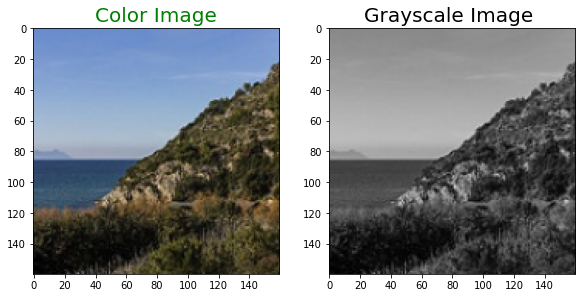

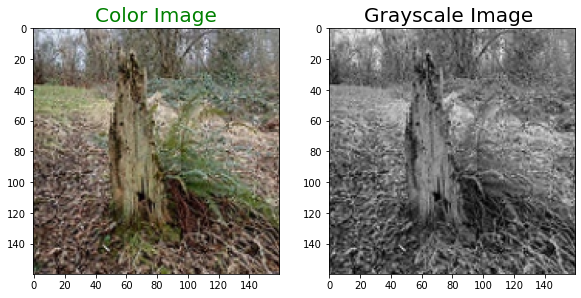

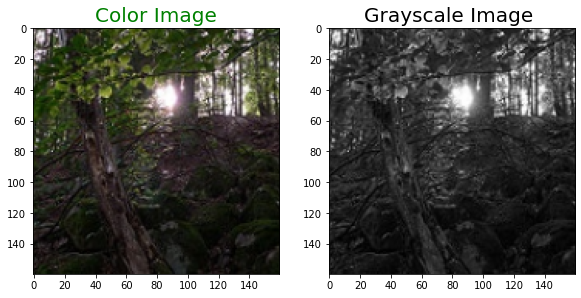

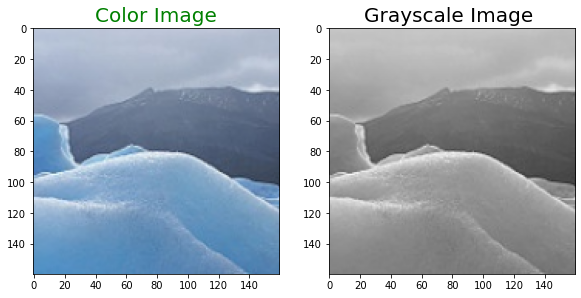

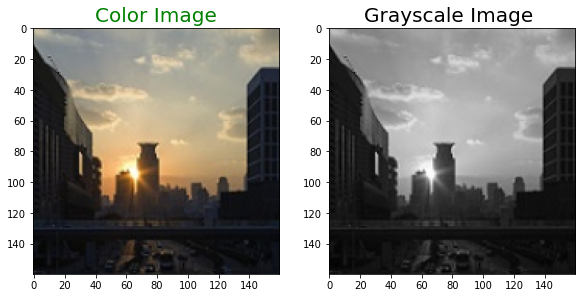

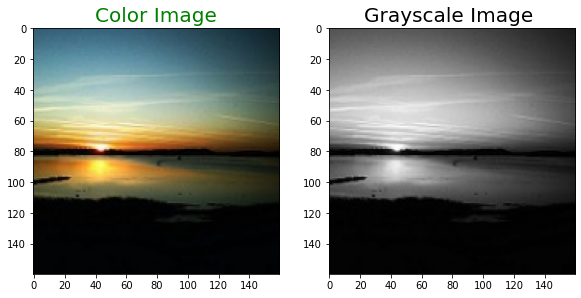

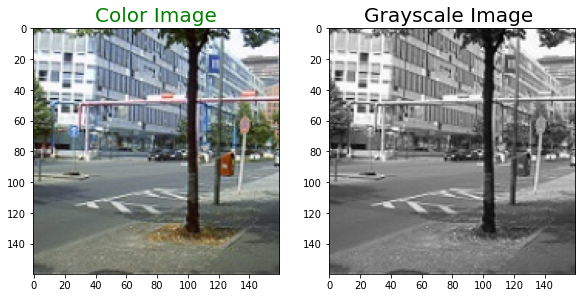

In [ ]:
for i in range(3,10):
     plot_images(color_img[i],gray_img[i])

In [ ]:
train_gray_image = gray_img[:1000]
train_color_image = color_img[:1000]

test_gray_image = gray_img[1000:]
test_color_image = color_img[1000:]
# reshaping
train_g = np.reshape(train_gray_image,(len(train_gray_image),SIZE,SIZE,3))
train_c = np.reshape(train_color_image, (len(train_color_image),SIZE,SIZE,3))
print('Train color image shape:',train_c.shape)


test_gray_image = np.reshape(test_gray_image,(len(test_gray_image),SIZE,SIZE,3))
test_color_image = np.reshape(test_color_image, (len(test_color_image),SIZE,SIZE,3))
print('Test color image shape',test_color_image.shape)

Train color image shape: (1000, 160, 160, 3)
Test color image shape (500, 160, 160, 3)


**Define Model**

In [ ]:
from tensorflow.keras import models,layers

In [ ]:
input_layer = layers.Input(shape=(160,160,3), name='input')
c1 = layers.Conv2D(128,(3,3),activation='relu',padding='same',strides=(2,2))(input_layer)
c2 = layers.Conv2D(256,(3,3),activation='relu',padding='same',strides=(2,2))(c1)
c3 = layers.Conv2D(512,(3,3),activation='relu',padding='same',strides=(2,2))(c2)

c4 = layers.Conv2DTranspose(512,(3,3),activation='relu',padding='same',strides=(2,2))(c3)
c5 = layers.Conv2DTranspose(256,(3,3),activation='relu',padding='same',strides=(2,2))(c4)
c6 = layers.Conv2DTranspose(128,(3,3),activation='relu',padding='same',strides=(2,2))(c5)
output_layer = layers.Conv2D(3,(3,3),activation='tanh',padding='same', name='output')(c6)

model = models.Model(input_layer,output_layer)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 160, 160, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 80, 80, 128)       3584      
                                                                 
 conv2d_1 (Conv2D)           (None, 40, 40, 256)       295168    
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 512)       1180160   
                                                                 
 conv2d_transpose (Conv2DTra  (None, 40, 40, 512)      2359808   
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 80, 80, 256)      1179904   
 ranspose)                                                   

In [ ]:
model.compile(optimizer='adam',loss='mse')
model.fit(train_g, train_c,epochs=20,shuffle=True)

Epoch 1/50
32/32 [==============================] - 524s 16s/step - loss: 0.0506
Epoch 2/50
32/32 [==============================] - 524s 16s/step - loss: 0.0191
Epoch 3/50
32/32 [==============================] - 523s 16s/step - loss: 0.0154
Epoch 4/50
32/32 [==============================] - 523s 16s/step - loss: 0.0144
Epoch 5/50
32/32 [==============================] - 522s 16s/step - loss: 0.0133
Epoch 6/50
32/32 [==============================] - 521s 16s/step - loss: 0.0126
Epoch 7/50
32/32 [==============================] - 523s 16s/step - loss: 0.0118
Epoch 8/50
32/32 [==============================] - 523s 16s/step - loss: 0.0109
Epoch 9/50
32/32 [==============================] - 524s 16s/step - loss: 0.0107
Epoch 10/50
32/32 [==============================] - 525s 16s/step - loss: 0.0101
Epoch 11/50
10/32 [========>.....................] - ETA: 6:07 - loss: 0.0120

In [ ]:
model.evaluate(test_gray_image,test_color_image)

16/16 [==============================] - 3s 162ms/step - loss: 0.0071


0.007120746187865734

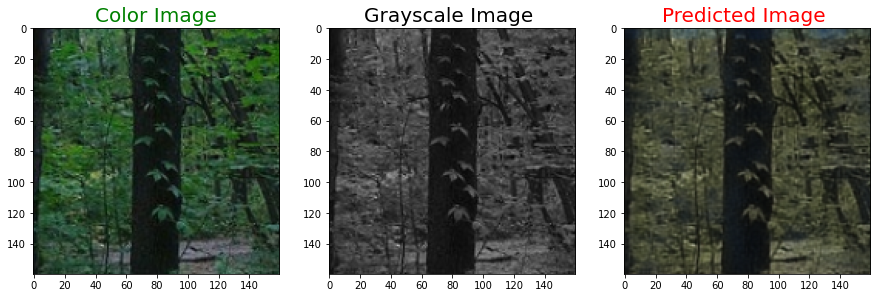

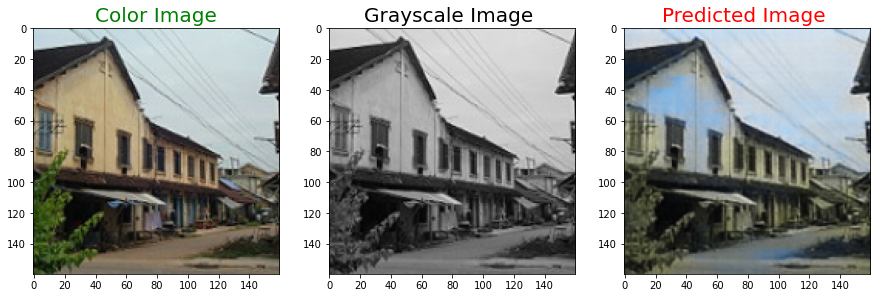

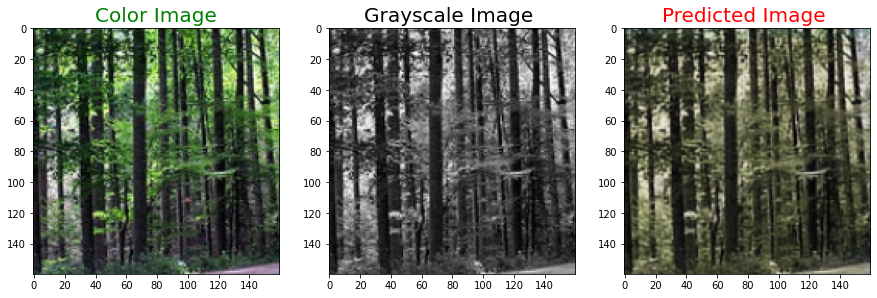

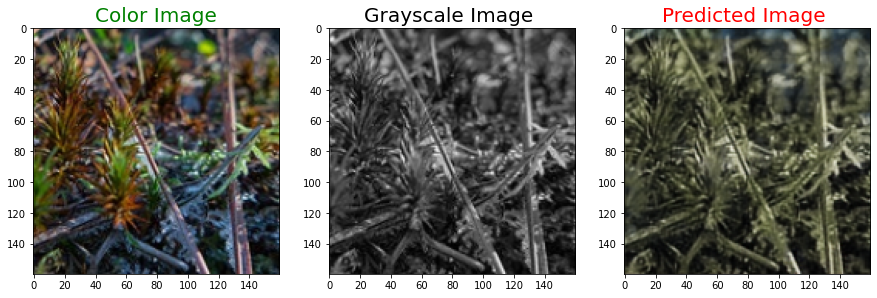

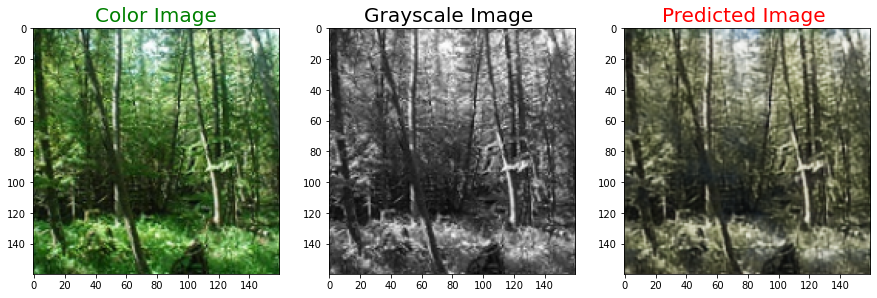

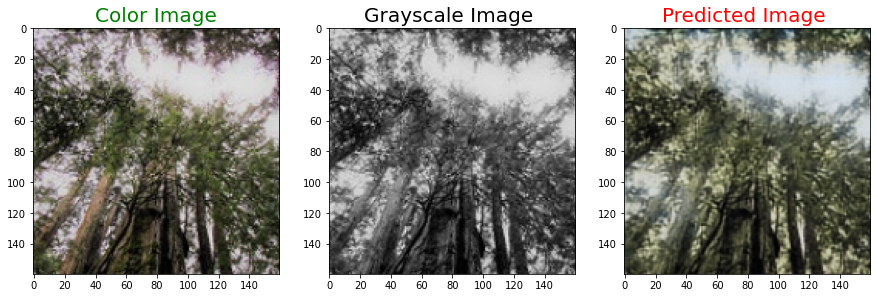

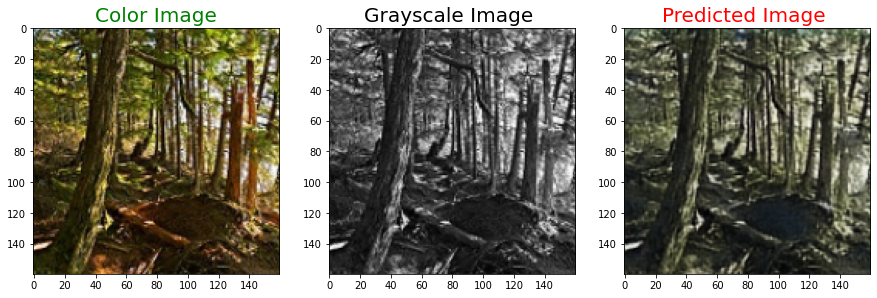

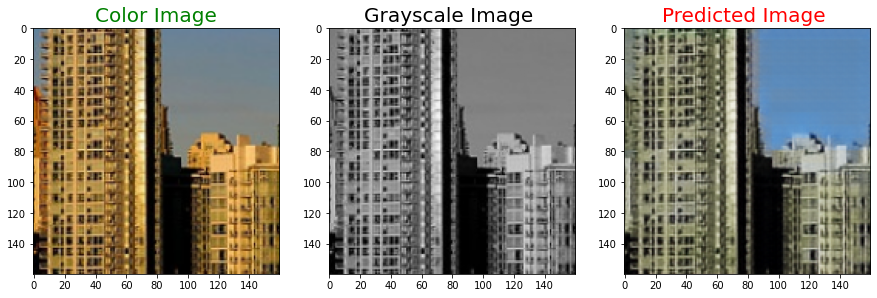

In [ ]:
# defining function to plot images pair
def plot_images(color,grayscale,predicted):
    plt.figure(figsize=(15,15))
    plt.subplot(1,3,1)
    plt.title('Color Image', color = 'green', fontsize = 20)
    plt.imshow(color)
    plt.subplot(1,3,2)
    plt.title('Grayscale Image ', color = 'black', fontsize = 20)
    plt.imshow(grayscale)
    plt.subplot(1,3,3)
    plt.title('Predicted Image ', color = 'Red', fontsize = 20)
    plt.imshow(predicted)

    plt.show()

for i in range(50,58):
    predicted = np.clip(model.predict(test_gray_image[i].reshape(1,SIZE, SIZE,3)),0.0,1.0).reshape(SIZE, SIZE,3)
    plot_images(test_color_image[i],test_gray_image[i],predicted)

